In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train,x_test=x_train/255.0,x_test/255.0

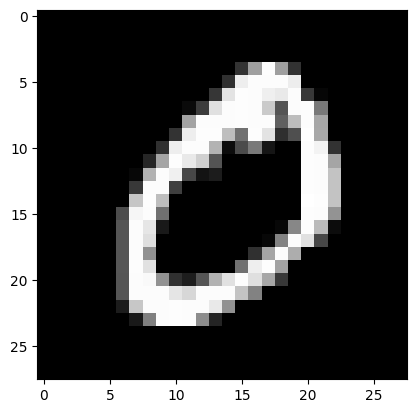

In [5]:
plt.imshow(x_train[1],cmap='gray')

In [10]:
model=keras.models.Sequential((keras.layers.Flatten(input_shape=(28,28)),
                               keras.layers.Dense(128,activation='relu'),# dense=fully connected
                               keras.layers.Dropout(0.2),
                               keras.layers.Dense(10,activation='softmax')))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2920 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1432 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1082 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0873 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0748 - accuracy: 0.9761


In [13]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0711 - accuracy: 0.9786 - 632ms/epoch - 2ms/step


[0.0711178258061409, 0.978600025177002]

1/1 [==============================] - 0s 37ms/step
1


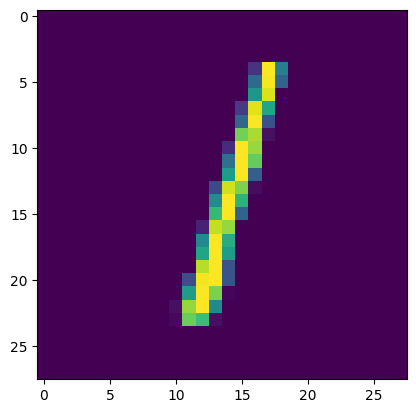

In [21]:
plt.imshow(x_test[2])
y_test_pred=model.predict(np.reshape(x_test[2],(-1,28,28)))# -1 میزاریم چون که میشه به صورت batch پردیکت کرد حتی
print(np.argmax(y_test_pred))